In [145]:
from sympy import *
from sympy.physics.hep.gamma_matrices import GammaMatrix as G, LorentzIndex, gamma_trace
from sympy.tensor.tensor import tensor_indices
from sympy.physics.hep.gamma_matrices import kahane_simplify
from sympy.physics.matrices import mgamma
from einsteinpy.symbolic.predefined import Schwarzschild 
from einsteinpy.symbolic import ChristoffelSymbols, RiemannCurvatureTensor, Tensor, BaseRelativityTensor, GenericVector, MetricTensor
from sympy.tensor.toperators import PartialDerivative
from sympy.tensor.tensor import TensorIndexType, TensorIndex, TensorHead, tensor_indices
import numpy as np

#i,j = tensor_indices('i,j', LorentzIndex)
init_printing(use_unicode=True)
f, theta, phi, u_0, t, c, hbar, m_ = symbols("f theta phi u_0 t c hbar m", real=True)


r = symbols("r", positive=True)
r_s,M ,R= symbols("r_s M R")
u_t , u_r , u_theta, u_phi = symbols("u_t u_r u_\\theta u_\phi", cls=Function)

Lorentz = TensorIndexType('Lorentz', dummy_name='Lorentz')
Global = TensorIndexType('Global', dummy_name='Global')
Fermi = TensorIndexType('Fermi', dummy_name='Fermi')
Dirac = TensorIndexType('Dirac', dummy_name="Dirac")

a, b, c, d = tensor_indices('a b c d', Lorentz)
alpha, beta, mu, nu, rho= tensor_indices('alpha beta mu nu rho', Global)
i,j,k,l,m = tensor_indices("i j k l m", Fermi)
A,B,C,D,E = tensor_indices("A B C D E", Dirac)

f,r,theta, phi, hbar

In [78]:
f = (1-r_s/r)
g_t = -f
g_r = 1/f
g_theta = r**2
g_phi = r**2 * sin(theta)**2

g = Matrix([[g_t, 0,0,0],[0,g_r,0,0],[0,0,g_theta,0],[0,0,0,g_phi]])
g_ = MetricTensor(g.tolist(),syms=[t,r,theta,phi], config='ll', name="ss-metric") 
ch = ChristoffelSymbols.from_metric(g_)
ch = ch.change_config("ull")
ch.tensor()

⎡                                        ⎡   ⎛1    rₛ⎞                        
⎢                                        ⎢rₛ⋅⎜─ - ───⎟                        
⎢                                        ⎢   ⎝2   2⋅r⎠                        
⎢                                        ⎢────────────        0               
⎢⎡                     -rₛ            ⎤  ⎢      2                             
⎢⎢      0         ──────────────  0  0⎥  ⎢     r                              
⎢⎢                   2 ⎛     rₛ⎞      ⎥  ⎢                                    
⎢⎢                2⋅r ⋅⎜-1 + ──⎟      ⎥  ⎢                  ⎛1    rₛ⎞         
⎢⎢                     ⎝     r ⎠      ⎥  ⎢              -rₛ⋅⎜─ - ───⎟         
⎢⎢                                    ⎥  ⎢                  ⎝2   2⋅r⎠         
⎢⎢     -rₛ                            ⎥  ⎢     0        ──────────────        
⎢⎢──────────────        0         0  0⎥  ⎢                          2         
⎢⎢   2 ⎛     rₛ⎞                      ⎥  ⎢          

In [79]:
#defining Killing-Yano tensor "Matrix"

f_ = Matrix(
    [
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,r**3 *sin(theta) ],
        [0,0,-r**3 * sin(theta),0]])
f_

⎡0  0      0           0    ⎤
⎢                           ⎥
⎢0  0      0           0    ⎥
⎢                           ⎥
⎢                   3       ⎥
⎢0  0      0       r ⋅sin(θ)⎥
⎢                           ⎥
⎢        3                  ⎥
⎣0  0  -r ⋅sin(θ)      0    ⎦

In [80]:
#from matrix to tensors

eta = Matrix([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

repl = {}
repl[Lorentz] = eta.tolist()
repl[Global] = g_.tensor().tolist()
repl[Fermi] = eta.tolist() #this only correct along the geodesic

Gamma = TensorHead('Gamma', [Global, Global, Global]) #the christoffel symbol
minkowski_m = TensorHead('eta', [Lorentz, Lorentz])
schwarzschild_m = TensorHead('g', [Global, Global])
KY = TensorHead("f", [Global, Global]) #Killin-Yano tensor
x = TensorHead('x', [Global])

repl[x(mu)] = [t, r, theta, phi]
repl[minkowski_m(-a, -b)] = eta.tolist()
repl[schwarzschild_m(-mu, -nu)] = g_.tensor().tolist()
repl[Gamma(alpha, -mu, -nu)] = ch.tensor().tolist()
repl[KY(-alpha, -beta)] = f_.tolist()


# verifying Killing-eq

$$\nabla_{\rho} f_{\mu \nu} + \nabla_{\nu} f_{\mu \rho} = 0$$
$$\partial_{\rho} f_{\mu \nu} + \partial_{\nu} f_{\mu \rho} - \Gamma^\alpha_{\rho \mu}f_{\alpha \nu} - \Gamma^\alpha_{\nu \mu}f_{\alpha \rho} - 2*\Gamma^\alpha_{\rho \nu}f_{\mu \alpha} = 0$$

In [81]:
Keq = PartialDerivative(KY(-mu, -nu), x(rho)) + PartialDerivative(KY(-mu, -rho), x(nu)) - Gamma(alpha,-rho,-mu)*KY(-alpha,-nu) - Gamma(alpha, -nu, -mu)*KY(-alpha, -rho) + 2*Gamma(alpha,-rho,-nu)*KY(-alpha,-mu) 
simplify(Keq.replace_with_arrays(repl, Keq.get_free_indices()))

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎤
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎣⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎦

# finding first tetraed

$L^\mu = f^\mu_{\ \ \ \nu} u^\nu$

In [82]:
u = TensorHead('u', [Global])
#u_t, u_r, u_theta, u_phi = symbols("u_t u_r u_theta u_phi", real = True, positive=True)
u_t = u_t(r)
u_r = u_r(r)
u_phi = u_phi(r)
repl[u(mu)] = [u_t, u_r, 0 ,u_phi]
L = KY(mu,-nu)*u(nu)
Norm_L = L(alpha)*L(-alpha)
Norm_value = Norm_L.replace_with_arrays(repl, [])
#therefore
e_2 = L/sqrt(Norm_value)
simplify(e_2.replace_with_arrays(repl, [mu])).subs(theta, pi/2)

/tmp/ipykernel_1552/1227335532.py:8: SymPyDeprecationWarning: 

Calling a tensor like Tensor(*indices) is deprecated. Use
Tensor.substitute_indices() instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-tensor-fun-eval
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  Norm_L = L(alpha)*L(-alpha)


⎡          u_\phi(r)       ⎤
⎢0  0  ─────────────────  0⎥
⎢           ____________   ⎥
⎢          ╱       2       ⎥
⎣      r⋅╲╱  u_\phi (r)    ⎦

In [84]:
e_1 = TensorHead('e_1', [Global])
L = Symbol("L", positive=True) #anuglar momentum
e_3 = TensorHead('e_3', [Global])
const = (r**2 + L**2)/(r**2 * L)

N_1 = sqrt(1+ L**2/r**2)
N_3 = sqrt(1 + r**2/L**2)

repl[e_1(mu)] = [u_r/(f*N_1), u_t*f/N_1, 0,0]
repl[e_3(mu)] = [u_t/N_3, u_r/N_3, 0,const]

$$u^\mu \partial_\mu \Psi = u^\mu\left(-e_3^\nu \partial_\mu e_{1\nu} + e_3^\nu \Gamma^\alpha_{\mu\nu}e_{1\alpha}\right)$$

In [87]:
expr = u(mu)*(-e_3(nu)*PartialDerivative(e_1(-nu), x(mu)) + e_3(nu)*Gamma(alpha, -nu, -mu)*e_1(-alpha))
F = simplify(expr.replace_with_arrays(repl, []).subs(theta, pi/2).subs(u_phi, L/r**2)/u_r)

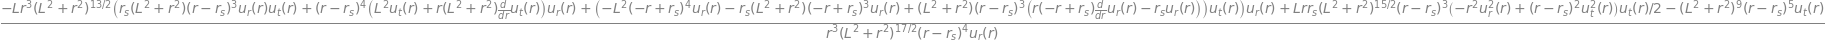

In [88]:
F

In [89]:
Energy = Symbol("E", positive=True)

F = simplify(F.subs(u_r, sqrt(2*Energy +  2*M/r - L**2/r**2 + 2*M*L**2/r**3)))

KeyboardInterrupt: 

In [90]:
u_val = u(mu).replace_with_arrays(repl, [mu]).tolist()
e_1_val = e_1(mu).replace_with_arrays(repl, [mu])
e_2_val = [0,0,1/r,0]
e_3_val = e_3(mu).replace_with_arrays(repl,[mu])


In [92]:
#defining the vierbein
tetraed = TensorHead("e", [Fermi, Global])

psi = symbols("Psi", cls=Function)
psi = psi(r)

repl[tetraed(-a, mu)] = [
    u_val,
    (e_1_val*cos(psi) - e_3_val*sin(psi)).tolist(),
    e_2_val,
    (e_3_val*sin(psi) + e_3_val*cos(psi)).tolist()
]

In [93]:
Riemann = TensorHead("R", [Global, Global, Global, Global])
rieman = RiemannCurvatureTensor.from_metric(g_)
rieman.tensor()

repl[Riemann(-mu, -nu, -alpha, -beta)] = rieman.change_config('llll').tensor().tolist()


In [98]:
R_in_fermi = Riemann(-mu,-nu,-alpha, -beta)*tetraed(-i,mu)*tetraed(-j,nu)*tetraed(-k,alpha)*tetraed(-l,beta)
#R_in_fermi.replace_with_arrays(repl, [-i,-j,-k,-l])

In [118]:
gamma = TensorHead("gamma", [Fermi, Dirac, Dirac])

repl[gamma(i,A,-B)] = [mgamma(0).tolist(), mgamma(1).tolist(), mgamma(2).tolist(), mgamma(3).tolist()]

spinor = TensorHead("Psi", [Dirac])
spinor_bar = TensorHead("Psi_bar", [Dirac])

repl[spinor(A)] = [1,0,0,0]

repl[spinor_bar(-A)] = (Matrix([1,0,0,0]).T@mgamma(0)).tolist()[0]

In [120]:
(spinor_bar(-A)*gamma(-i,A,-B)*gamma(-j,B,-C)*spinor(C)).replace_with_arrays(repl, [-i,-j])



⎡1  0   0   0 ⎤
⎢             ⎥
⎢0  -1  -ⅈ  0 ⎥
⎢             ⎥
⎢0  ⅈ   -1  0 ⎥
⎢             ⎥
⎣0  0   0   -1⎦

In [124]:
(spinor_bar(-A)*gamma(-i,A,-B)*spinor(B)).replace_with_arrays(repl, [-0])

AttributeError: 'int' object has no attribute 'tensor_index_type'

In [174]:
#spinor(Dirac(0)
spinor(A)


In [176]:
spinor()

ValueError: wrong number of indices

In [87]:


#r_s = 0


u_t = u_t(t,r,phi)
u_r = u_r(t,r,phi)
#u_r = 0

u_phi = u_phi(t,r,phi)
u_theta = u_theta(t,r,phi)
u_phi = 0


N_1 = sqrt(g_r + u_r**2 * g_r**2)
#N_1 = g_r + u_r**2 * g_r**2


a = g_phi * u_phi - (g_phi * u_phi*u_r**2 * g_r**2)/N_1
b = (g_phi * u_r * g_r * u_phi)/N_1
N_2 = sqrt(g_phi*(1+ 2*a*u_phi) - g_r*b*(b + 2*a*u_r)- a**2)


#u_theta = 0
# u^2 = -1 => u_t = something

#and set theta = pi/2

u_t = sqrt(r*(r**3*u_phi**2 - r**2*r_s*u_phi**2 + r*u_r**2 + r - r_s))/(r - r_s)



e_ = Matrix([[u_t, (u_r*u_t*g_r)/N_1,0,a*u_t/N_2],[u_r,( 1+ u_r**2 * g_r)/N_1,0,(a*u_r - b)/N_2],[0,0,1/sqrt(g_theta),0],[u_phi, (u_phi*u_r*g_r)/N_1,0,(1+a*u_phi)/N_2]])


e_ = e_.T

In [88]:
e_

⎡               _________________________                                     
⎢              ╱     2                                                        
⎢         √r⋅╲╱  r⋅uᵣ (t, r, φ) + r - rₛ                                      
⎢         ───────────────────────────────                     uᵣ(t, r, φ)     
⎢                      r - rₛ                                                 
⎢                                                                             
⎢                                                                 2           
⎢                                                               uᵣ (t, r, φ)  
⎢                                                           1 + ────────────  
⎢         _________________________                                    rₛ     
⎢        ╱     2                                                   1 - ──     
⎢   √r⋅╲╱  r⋅uᵣ (t, r, φ) + r - rₛ ⋅uᵣ(t, r, φ)                        r      
⎢─────────────────────────────────────────────────  

⎡     rₛ                        ⎤
⎢-1 + ──    0     0       0     ⎥
⎢     r                         ⎥
⎢                               ⎥
⎢           1                   ⎥
⎢   0     ──────  0       0     ⎥
⎢             rₛ                ⎥
⎢         1 - ──                ⎥
⎢             r                 ⎥
⎢                               ⎥
⎢                  2            ⎥
⎢   0       0     r       0     ⎥
⎢                               ⎥
⎢                      2    2   ⎥
⎣   0       0     0   r ⋅sin (θ)⎦

In [91]:
simplify(e_@g@e_.T).subs(theta,pi/2)

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  0  0⎥
⎢           ⎥
⎢0   0  1  0⎥
⎢           ⎥
⎣0   0  0  1⎦

$\newcommand{\overbar}[1]{\mkern 1.5mu\overline{\mkern-1.5mu#1\mkern-1.5mu}\mkern 1.5mu}\textbf{}$

$\delta v_\alpha = \frac{\hbar}{m i } \overbar{\Psi}_0^{(\sigma)} \Gamma_\alpha \Psi_0^{(\sigma)}$ \
$\delta v_\alpha = \frac{\hbar}{m i } \frac{-1}{2}\overbar{\Psi}_0^{(\sigma)} \omega_{\alpha a b}\Gamma_{(1/2)}(M^{a b }) \Psi_0^{(\sigma)}$ \
$\delta v_\alpha = -\frac{\hbar}{2m i } \omega_{\alpha a b}\overbar{\Psi}_0^{(\sigma)} \Gamma_{(1/2)}(M^{a b }) \Psi_0^{(\sigma)}$
$:= -\frac{\hbar}{2m i } \omega_{\alpha a b}\Sigma^{ab}$

$\Sigma^{ab} = \overbar{\Psi}_0^{(\sigma)} \Gamma_{(1/2)}(M^{a b }) \Psi_0^{(\sigma)} =  \frac{1}{4}\overbar{\Psi}_0^{(\sigma)} \left[ \gamma^a, \gamma^b\right]\Psi_0^{(\sigma)}$

In [45]:
xi = symbols("\\xi", real=True)
chi = symbols("\\chi", real=True)

def commutator(a,b):
    return mgamma(a)@mgamma(b) - mgamma(b)@mgamma(a)

def Sigma(a,b):
    #psi = Matrix([[cos(xi/2),exp(I*chi)*sin(xi/2),0,0]]).T
    psi = Matrix([[1,0,0,0]]).T #z-direction
    #psi = Matrix([[0,1,0,0]]).T
    #psi = Matrix([[1/sqrt(2), I*1/sqrt(2),0,0]]) #y-direction
    #psi = Matrix([[1/sqrt(2), -1/sqrt(2),0,0]]).T

    return conjugate(psi).T@mgamma(0)@commutator(a,b)@psi/4

def Sigma_as_Matrix():
    s = zeros(4)
    for i in range(4):
        for j in range(4):
            s[i,j] = Sigma(i,j)
    return s


Sigma_ab = Sigma_as_Matrix()
simplify(Sigma_ab)


⎡0  0   0   0⎤
⎢            ⎥
⎢      -ⅈ    ⎥
⎢0  0  ───  0⎥
⎢       2    ⎥
⎢            ⎥
⎢   ⅈ        ⎥
⎢0  ─   0   0⎥
⎢   2        ⎥
⎢            ⎥
⎣0  0   0   0⎦

KeyboardInterrupt: 

In [ ]:
ch.tensor()

⎡                                        ⎡   ⎛1    rₛ⎞                        
⎢                                        ⎢rₛ⋅⎜─ - ───⎟                        
⎢                                        ⎢   ⎝2   2⋅r⎠                        
⎢                                        ⎢────────────        0               
⎢⎡                     -rₛ            ⎤  ⎢      2                             
⎢⎢      0         ──────────────  0  0⎥  ⎢     r                              
⎢⎢                   2 ⎛     rₛ⎞      ⎥  ⎢                                    
⎢⎢                2⋅r ⋅⎜-1 + ──⎟      ⎥  ⎢                  ⎛1    rₛ⎞         
⎢⎢                     ⎝     r ⎠      ⎥  ⎢              -rₛ⋅⎜─ - ───⎟         
⎢⎢                                    ⎥  ⎢                  ⎝2   2⋅r⎠         
⎢⎢     -rₛ                            ⎥  ⎢     0        ──────────────        
⎢⎢──────────────        0         0  0⎥  ⎢                          2         
⎢⎢   2 ⎛     rₛ⎞                      ⎥  ⎢          

In [ ]:
type(u_t), type(u_r),type(u_phi) , type(u_theta)

(sympy.core.mul.Mul, u_r, u_\phi, u_\theta)

In [ ]:
#du_dtau =  tensor_product(tensor_product(ch.change_config('ull'),u.change_config('u'), 1,0), u.change_config('u'),1,0)
#print(simplify(du_dtau.tensor()*(-1)))

In [92]:


#E = TensorHead('E', [Global, Lorentz])
e = TensorHead('e', [Lorentz, Global])

sigma = TensorHead('sigma', [Lorentz, Lorentz])








repl[e(-a, alpha)] = (e_).tolist()
repl[sigma(a, b)] = Sigma_ab.tolist()








In [94]:
E = schwarzschild_m(-nu, -alpha)*e(-a, alpha)*minkowski_m(a, b)


$\omega_{\mu a b} = \Gamma^\alpha_{\ \ \ \nu \mu}e_a^{\ \ \  \nu}E_\alpha^{\ \  \ c}\eta_{b c}      - \partial_\mu (E_\alpha^{\ \ \ \ c})e_a^{\  \ \ \alpha}\eta_{b c}  $ 


$\omega_{\mu}^{ab} = \Gamma^\nu_{\ \ \ \alpha \mu}E_\nu^{\ \ \  a}E^{\alpha b}    - E^{\nu b}(\partial_\mu  E_\nu^{\ \  \ a}) $ 




In [97]:
#omega_1 = PartialDerivative(E(-alpha, c), x(mu))*e(-a, alpha)*minkowski_m(-b, -c)
#omega = Gamma(alpha, -nu, -mu)*e(-a, nu)*E(-alpha, c)*minkowski_m(-b, -c) - PartialDerivative(E(-alpha, c), x(mu))*e(-a, alpha)*minkowski_m(-b, -c)
omega = Gamma(nu,-alpha,-mu)*E(-nu,a)*E(alpha,b) - E(nu,b)*PartialDerivative(E(-nu, a), x(mu))

#omega = Gamma(nu,-alpha,-mu)*e(a,-nu)*e(b,alpha) - e(b,nu)*PartialDerivative(e(a,-nu), x(mu))
omega.get_free_indices()

/tmp/ipykernel_230/2285594167.py:3: SymPyDeprecationWarning: 

Calling a tensor like Tensor(*indices) is deprecated. Use
Tensor.substitute_indices() instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-tensor-fun-eval
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  omega = Gamma(nu,-alpha,-mu)*E(-nu,a)*E(alpha,b) - E(nu,b)*PartialDerivative(E(-nu, a), x(mu))


In [93]:
simplify((e(-a,mu)*e(-b,nu)*schwarzschild_m(-mu,-nu)).replace_with_arrays(repl, [-a,-b]))

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  0  0⎥
⎢           ⎥
⎢0   0  1  0⎥
⎢           ⎥
⎣0   0  0  1⎦

In [100]:
(omega(-mu,a,b)*u(mu)).replace_with_arrays(repl,[a,b])

/tmp/ipykernel_230/2822462560.py:1: SymPyDeprecationWarning: 

Calling a tensor like Tensor(*indices) is deprecated. Use
Tensor.substitute_indices() instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-tensor-fun-eval
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  (omega(-mu,a,b)*u(mu)).replace_with_arrays(repl,[a,b])


In [96]:
simplify((E(-mu, a)*e(-b,mu)).replace_with_arrays(repl, [a,-b]))

/tmp/ipykernel_230/3457352859.py:1: SymPyDeprecationWarning: 

Calling a tensor like Tensor(*indices) is deprecated. Use
Tensor.substitute_indices() instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-tensor-fun-eval
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  simplify((E(-mu, a)*e(-b,mu)).replace_with_arrays(repl, [a,-b]))


⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [98]:
omega_sigma = omega(-mu, a, b)*sigma(-a, -b)
omega_sigma

/tmp/ipykernel_230/716785405.py:1: SymPyDeprecationWarning: 

Calling a tensor like Tensor(*indices) is deprecated. Use
Tensor.substitute_indices() instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-tensor-fun-eval
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  omega_sigma = omega(-mu, a, b)*sigma(-a, -b)


In [99]:

dv = Matrix(omega_sigma.replace_with_arrays(repl, [mu]).tolist())/(-2*m_*I)
dv = simplify(dv.subs(theta,pi/2))


KeyboardInterrupt: 

In [52]:
#taylor expansion in r_s
simplify((dv.subs(r_s, 0) + dv.diff(r_s).subs(r_s, 0)*r_s).subs(sqrt(r**2), r).subs(theta,pi/2))

⎡              0              ⎤
⎢                             ⎥
⎢              0              ⎥
⎢                             ⎥
⎢      ⎛  2             ⎞     ⎥
⎢- 2⋅r⋅⎝uᵣ (t, r, φ) + 1⎠ + rₛ⎥
⎢─────────────────────────────⎥
⎢           __________________⎥
⎢      3   ╱   2              ⎥
⎢ 4⋅m⋅r ⋅╲╱  uᵣ (t, r, φ) + 1 ⎥
⎢                             ⎥
⎣              0              ⎦

In [58]:
simplify(dv.subs(r_s,0))

⎡           0           ⎤
⎢                       ⎥
⎢           0           ⎥
⎢                       ⎥
⎢    __________________ ⎥
⎢   ╱   2               ⎥
⎢-╲╱  uᵣ (t, r, φ) + 1  ⎥
⎢───────────────────────⎥
⎢              2        ⎥
⎢         2⋅m⋅r         ⎥
⎢                       ⎥
⎣           0           ⎦

In [53]:
dv_ = simplify(dv.subs(r_s, 0).subs(sqrt(r**2), r)).subs(theta, pi/2)
dv = TensorHead('eta', [Global])
repl[dv(mu)] = (dv_.T).tolist()[0]

Gamma(mu, -alpha, -beta)*u(beta)*dv(alpha)

In [54]:
du_dtau = Gamma(alpha, -nu, -mu)*u(nu)*u(mu)
du_dtau.replace_with_arrays(repl,[alpha]).subs(r_s, 0).subs(theta, pi/2)

[0  0  0  0]

In [ ]:
v_local = dv_(mu)*E(-mu, a)
j = Matrix(u.replace_with_arrays(repl, [a])) + Matrix(v_local.replace_with_arrays(repl, [a]))
j_ = TensorHead("j", [Lorentz])
repl[j_(a)] = j.T.tolist()[0]
result = j_(a)*E_inv(-a, mu)
simplify(result.replace_with_arrays(repl, [mu]))

⎡                       ________        ⎤
⎢                      ╱     rₛ         ⎥
⎢                     ╱  1 - ──         ⎥
⎢                   ╲╱       r          ⎥
⎢uₜ  uᵣ  u_\theta + ────────────  u_\phi⎥
⎢                           2           ⎥
⎣                      4⋅m⋅r            ⎦

In [ ]:
u_2 = tensor_product(u,u.change_config('l'), 0,0)

print(u_2.tensor())


(r**3*(r - r_s)*(u_\theta**2 + u_phi**2*sin(theta)**2) + r**2*u_r**2 - u_t**2*(r - r_s)**2)/(r*(r - r_s))


In [ ]:
u_2_expr = (r**3*(r - r_s)*(u_theta**2 + u_phi**2*sin(theta)**2) + r**2*u_r**2 - u_t**2*(r - r_s)**2)/(r*(r - r_s))
print(solve(u_2_expr + 1, u_t))

[-sqrt(r*(r**3*u_\theta**2 + r**3*u_phi**2*sin(theta)**2 - r**2*r_s*u_\theta**2 - r**2*r_s*u_phi**2*sin(theta)**2 + r*u_r**2 + r - r_s))/(r - r_s), sqrt(r*(r**3*u_\theta**2 + r**3*u_phi**2*sin(theta)**2 - r**2*r_s*u_\theta**2 - r**2*r_s*u_phi**2*sin(theta)**2 + r*u_r**2 + r - r_s))/(r - r_s)]


In [ ]:
rieman = RiemannCurvatureTensor.from_metric(g_)
sig = BaseRelativityTensor(sigma,syms=[t,r,theta,phi], config="uu", name="sigma", parent_metric=m)
sig.tensor()

NameError: name 'sigma' is not defined

In [ ]:

contraction = tensorcontraction(tensor_product(tensor_product(rieman.change_config("llll"),u, 1,0),sig,1,0,).tensor(),(1,2))
#contraction.tensor()

In [ ]:
a = GenericVector(contraction.subs(f,1-r_s),syms=[t,r,theta,phi], config='l', name="acceleration", parent_metric=m)

In [ ]:
a = a.change_config('u')
print(a.tensor())

[0, -r_s*u_\theta*sqrt(1 - r_s)/r**2, r_s*u_r*sqrt(1 - r_s)/(r**3*(r - r_s)), 0]


In [ ]:
R = 6371
l = 100

x = np.sqrt(R**2 + l**2) - R
x

In [ ]:
2/3 * 1E-8 / 6.58E-16

In [ ]:
E = 2.4*1E6
m = 1.5E-6

alpha = E**2/m**2



beta = np.sqrt((alpha-1)/(alpha+2))
beta

In [101]:
x = Symbol("x")
A = Matrix([[cos(x), -sin(x)],[sin(x), cos(x)]])
A

⎡cos(x)  -sin(x)⎤
⎢               ⎥
⎣sin(x)  cos(x) ⎦

In [103]:
B = diff(A,x)
B

⎡-sin(x)  -cos(x)⎤
⎢                ⎥
⎣cos(x)   -sin(x)⎦

In [107]:
simplify(B.inv()@A)

⎡0   1⎤
⎢     ⎥
⎣-1  0⎦